# Decision Trees & Random Forest 

This notebook is used in the second week of Spiced Academy's Data Science Bootcamp.


### Data Set 1: Titanic from Kaggle

- The data was downloaded from Kaggle on the 27.02.2020:

    https://www.kaggle.com/c/titanic/

- **Variable Notes**

    - pclass: A proxy for socio-economic status (SES)
        - 1st = Upper
        - 2nd = Middle
        - 3rd = Lower

    - age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    - sibsp: Siblings and spouse
    - parch: Parent child
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.


### Data Set 2: Iris from Sklearn

**Extra notes:** After the installation of graphviz package using conda install graphviz or pip install graphviz, if you get an error running it (make sure to add its path to your file) 

In [4]:
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, roc_curve
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'
df = pd.read_csv('../../data/titanic/train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Our own decision tree! (well, an attempt...)

In [5]:
y = df['Survived'] #labels, true

ypred = [] #fill in this list of predictions with 1s (survived) and 0s 
for i, row in df.iterrows():
    
    if row['Sex'] == 'female': #are they a man or a woman?
        
        if row['Pclass'] < 3: #if it's a woman, are they in the middle-class?
            
            
            if row['Parch'] < 4: # if it's a woman in the middle-class
                                 #, do they have less than 4 children / 
                                 # parents?
                
                ypred.append(1)
                
            else:
                
                ypred.append(0)
            
        else:
            
            ypred.append(0)
            
            
    else:
        ypred.append(0)

In [177]:
conf=confusion_matrix(y,ypred)

accuracy = (conf[0,0]+conf[1,1])/conf[:].sum()

print(accuracy_score(y, ypred), accuracy)




0.7867564534231201 0.7867564534231201


- Keeping track of branches is tough!
- how do we even now what question to ask??

### Luckily, there is a DecisionTree model already in sklearn that can figure out all of this hard brain work for us!

This is actually one of the newer approaches in machine learning!

In [178]:
from sklearn.tree import DecisionTreeClassifier

In [179]:
m = DecisionTreeClassifier()


In [180]:
#Sex = [[ 1 if x == 'Male' else 0  for x in df['Sex']]]

In [181]:
df['Sex'].replace('female', 0, inplace=True)
df['Sex'].replace('male', 1, inplace=True)

In [182]:
X = df[['Sex', 'Pclass', 'SibSp', 'Parch']]
y = df['Survived']


In [183]:
m.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [184]:
m.score(X, y)


0.8170594837261503

In [185]:
graph = graphviz.Source(tree)
graph.render('titanic')  # creates PDF
#graph  # in Jupyter

'titanic.pdf'

In [186]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Ugur/Anaconda3/Library/bin/graphviz'

tree = export_graphviz(m, out_file=None,
                class_names=["Dead", "Survived"],
                feature_names=['Sex', 'Passenger Class', 'Siblings & Spouses', 'Parents & Children'],
                impurity=False,
                filled=True)
open('titanic.dot', 'w').write(tree)

12474

### Now going back to the initial decision tree and first looking for feature importances

In [187]:
feature_label = X.columns
feature_importance =m.feature_importances_

print(feature_label,feature_importance)

Index(['Sex', 'Pclass', 'SibSp', 'Parch'], dtype='object') [0.62665511 0.21407716 0.07756369 0.08170404]


Change the max_depth in the initial one.

### IRIS DATA SET AND GRAPHVIZ CONTOURS

https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Constructing_Decision_Tree_Learning_Information_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php


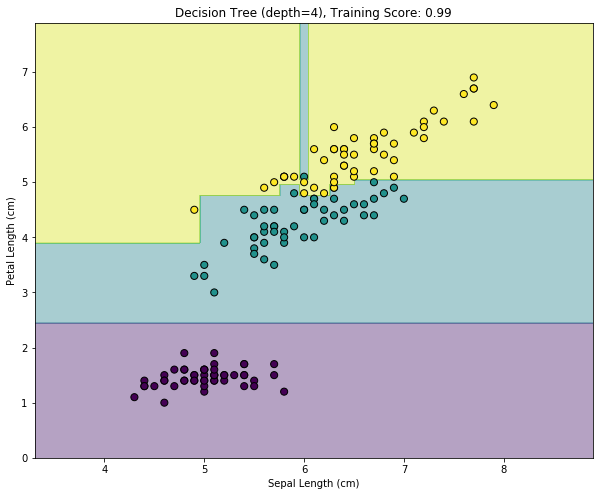

In [2]:
# Source code adapted (simplified) from Scikit-Learn website
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
# © 2007 - 2019, scikit-learn developers (BSD License).

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading some example data to play with
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Train a classification model
m = DecisionTreeClassifier()
# m = RandomForestClassifier(n_estimators=100, max_depth=50)
m.fit(X, y)

# What about other models? Try them here as well.


#step size in the mesh
h = 0.01

# Plotting decision regions
#For that, we will assign a color to each point in the mesh 
#[x_min, x_max] * [y_min, y_max]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

f, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))
#f, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10, 8))

Xgrid = np.c_[xx.ravel(), yy.ravel()]
Z = m.predict(Xgrid)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)

#plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_title(f'Decision Tree (depth=4), Training Score: {round(m.score(X, y), 2)}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

plt.show()

In [3]:
tree = export_graphviz(m, out_file=None,
                class_names=["Species 1", "Species 2", "Species 3"],
                feature_names=['Sepal Length', 'Petal Length'],
                impurity=False,
                filled=True)
open('iris.dot', 'w').write(tree)

graph = graphviz.Source(tree)
graph.render('iris')  # creates PDF
# graph  # in Jupyter

NameError: name 'export_graphviz' is not defined

# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
m_rf=rf.fit(X,y)
y_pred_rf=m_rf.predict(X)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [5]:
accuracy_score(y,y_pred_rf)

NameError: name 'accuracy_score' is not defined

## Let's do this properly

In [1]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y)

dm = DecisionTreeClassifier()
dm.fit(x_train,y_train)
y_pred=dm.predict(x_test)
accuracy_score(y_test,y_pred)
dm

NameError: name 'X' is not defined

In [204]:

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)